# Example 10.4: Rankine with Reheat

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
A Rankine cycle operates with water as the working fluid with a turbine inlet condition of 3 MPa and $550^\circ\mathrm{C}$.  After expansion to 400 kPa, the steam is reheated to $550^\circ\mathrm{C}$ and then expanded to 15 kPa.  For isentropic efficiencies of $\eta_t=0.8$ and $\eta_p=0.6$ find:
* (a) Specific net work (kJ/kg)
* (c) Thermal efficiency of the cycle
* (d) Sketch a $T$-$s$ diagram of the cycle
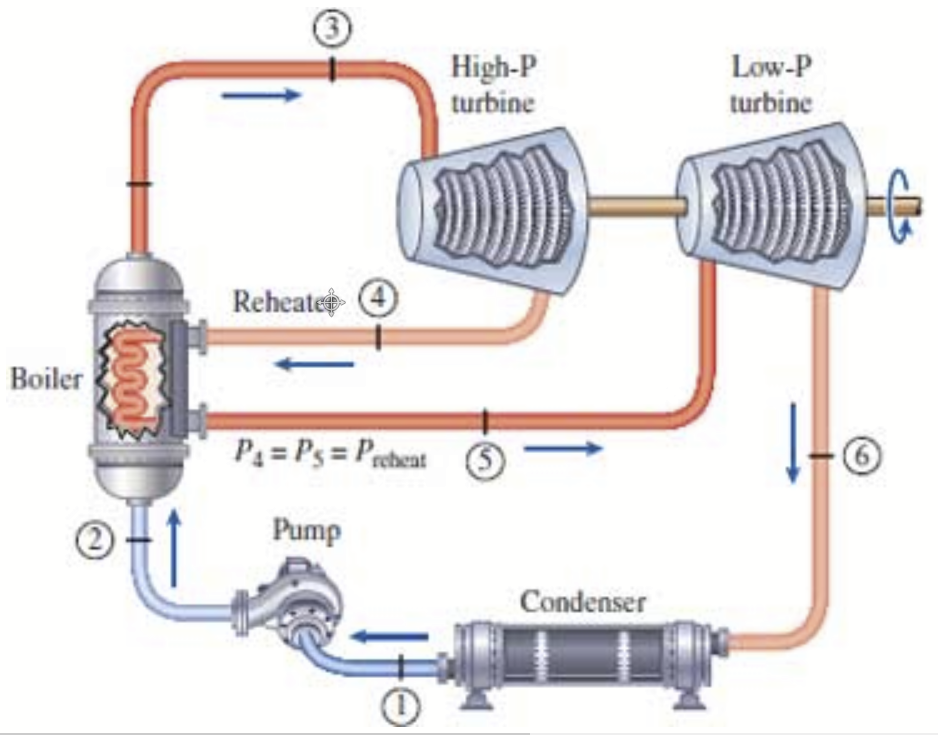

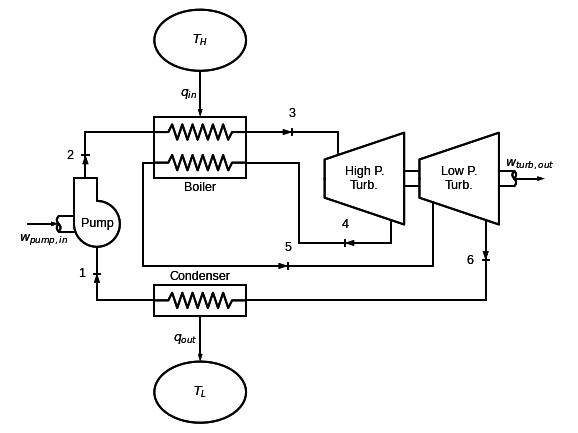

In [4]:
# import schematics # <- uncomment to regenerate schematic
# schematics.rankine_with_reheat(file='Figures/Rankine_with_reheat.png'); # <- uncomment to regenerate schematic
from IPython.display import Image
Image('Figures/Rankine_with_reheat.png')

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=2140124&node=7988506&a=567694269&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [5]:
from kilojoule.templates.kSI_C import *
   
water = realfluid.Properties('Water')

### Given Parameters
We now define variables to hold our known values.

In [6]:
T[3] = Quantity(550.0,'degC') # Turbine inlet temperature
p[3] = Quantity(3.0,'MPa')    # Turbine inlet pressure
p[4] = Quantity(400.0,'kPa')  # Pressure after first expansion
T[5] = Quantity(550.0,'degC') # Reheat temperature
p[6] = Quantity(15.0,'kPa')   # Pressure after second expansion
eta_t = 0.8                 # Turbine isentropic efficiency
eta_p = 0.6                 # Pump isentropic efficiency

Summary();

### Assumptions
- Non-ideal work devices
- Superheat in boiler: superheated vapor at boiler exit
- Single phase into pump: saturated liquid at condenser exit
- Isobaric heat exchagners
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [7]:
x[1] = 0      # Single phase into pump
p[2] = p[3]   # isobaric heat exchanger
p[5] = p[4]   # isobaric heat exchanger
p[1] = p[6]   # isobaric heat exchanger

Summary();

#### (a) Mass flow rate

In [8]:
%%showcalc
"### State 1)"
T[1] = water.T(p[1],x[1])
v[1] = water.v(p[1],x[1])
h[1] = water.h(p[1],x[1])
s[1] = water.s(p[1],x[1])

"### 1-2) Non-ideal compression"
"Isentropic compression"
p['2s'] = p[2]
s['2s'] = s[1]
T['2s'] = water.T(p['2s'],s['2s'])
h['2s'] = water.h(p['2s'],s['2s'])
v['2s'] = water.v(p['2s'],s['2s'])
"Actual compression"
h[2] = h[1] + (h['2s']-h[1])/eta_p
T[2] = water.T(p[2],h=h[2])
v[2] = water.v(p[2],h=h[2])
s[2] = water.s(p[2],h=h[2])
w_1_to_2 = h[1]-h[2]

"### 2-3) Isobaric heat addition"
v[3] = water.v(T[3],p[3])
h[3] = water.h(T[3],p[3])
s[3] = water.s(T[3],p[3])

"### 3-4) Non-ideal expansion"
"Isentropic Expansion"
p['4s'] = p[4]
s['4s'] = s[3]
T['4s']= water.T(p['4s'],s['4s'])
v['4s']= water.v(p['4s'],s['4s'])
h['4s'] = water.h(p['4s'],s['4s'])
x['4s'] = water.x(p['4s'],s['4s'])
"Actual expansion"
h[4] = h[3] - eta_t*(h[3]-h['4s'])
T[4] = water.T(p[4],h=h[4])
v[4] = water.v(p[4],h=h[4])
s[4] = water.s(p[4],h=h[4])
x[4] = water.x(p[4],h=h[4])
w_3_to_4 = h[3]-h[4]

"### 4-5) Isobaric heat addition"
v[5] = water.v(T[5],p[5])
h[5] = water.h(T[5],p[5])
s[5] = water.s(T[5],p[5])

"### 5-6) Non-ideal expansion"
"Isentropic Expansion"
p['6s'] = p[6]
s['6s'] = s[5]
T['6s']= water.T(p['6s'],s['6s'])
v['6s']= water.v(p['6s'],s['6s'])
h['6s'] = water.h(p['6s'],s['6s'])
x['6s'] = water.x(p['6s'],s['6s'])
"Actual expansion"
h[6] = h[5] - eta_t*(h[5]-h['6s'])
T[6] = water.T(p[6],h=h[6])
v[6] = water.v(p[6],h=h[6])
s[6] = water.s(p[6],h=h[6])
x[6] = water.x(p[6],h=h[6])
w_5_to_6 = h[5]-h[6]

"### Mass flow rate"
w_net = w_1_to_2 + w_3_to_4 + w_5_to_6

### State 1)
\begin{align}
  {T}_{ 1 } &=  \mathrm{ \underset{ water }{ T } }\left( {p}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ water }{ T } }\left( 15.0\ \mathrm{kPa}, 0 \right) = 53.969\ \mathrm{°C}
\end{align}

\begin{align}
  {v}_{ 1 } &=  \mathrm{ \underset{ water }{ v } }\left( {p}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ water }{ v } }\left( 15.0\ \mathrm{kPa}, 0 \right) = 0.001014\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {h}_{ 1 } &=  \mathrm{ \underset{ water }{ h } }\left( {p}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ water }{ h } }\left( 15.0\ \mathrm{kPa}, 0 \right) = 225.94\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 1 } &=  \mathrm{ \underset{ water }{ s } }\left( {p}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ water }{ s } }\left( 15.0\ \mathrm{kPa}, 0 \right) = 0.75486\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

### 1-2) Non-ideal compression
Isentropic compression
\begin{align}
  {p}_{ \mathrm{2s} } &=  {p}_{ 2 }  = 3000.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{2s} } &=  {s}_{ 1 }  = 0.75486\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {T}_{ \mathrm{2s} } &=  \mathrm{ \underset{ water }{ T } }\left( {p}_{ \mathrm{2s} }, {s}_{ \mathrm{2s} } \right)  = \mathrm{ \underset{ water }{ T } }\left( 3000.0\ \mathrm{kPa}, 0.75486\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 54.084\ \mathrm{°C}
\end{align}

\begin{align}
  {h}_{ \mathrm{2s} } &=  \mathrm{ \underset{ water }{ h } }\left( {p}_{ \mathrm{2s} }, {s}_{ \mathrm{2s} } \right)  = \mathrm{ \underset{ water }{ h } }\left( 3000.0\ \mathrm{kPa}, 0.75486\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 228.97\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {v}_{ \mathrm{2s} } &=  \mathrm{ \underset{ water }{ v } }\left( {p}_{ \mathrm{2s} }, {s}_{ \mathrm{2s} } \right)  = \mathrm{ \underset{ water }{ v } }\left( 3000.0\ \mathrm{kPa}, 0.75486\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 0.0010128\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

Actual compression
\begin{align}
  {h}_{ 2 } &=  {h}_{ 1 } + \frac{  {h}_{ \mathrm{2s} } - {h}_{ 1 }  }{ \eta_{p} } \\
    &= 225.94\ \frac{\mathrm{kJ}}{\mathrm{kg}} + \frac{  228.97\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 225.94\ \frac{\mathrm{kJ}}{\mathrm{kg}}  }{  0.6  }\\
    &= 230.99\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ 2 } &=  \mathrm{ \underset{ water }{ T } }\left( {p}_{ 2 }, \mathrm{ h } = {h}_{ 2 } \right)  = \mathrm{ \underset{ water }{ T } }\left( 3000.0\ \mathrm{kPa}, \mathrm{ h } = 230.99\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 54.567\ \mathrm{°C}
\end{align}

\begin{align}
  {v}_{ 2 } &=  \mathrm{ \underset{ water }{ v } }\left( {p}_{ 2 }, \mathrm{ h } = {h}_{ 2 } \right)  = \mathrm{ \underset{ water }{ v } }\left( 3000.0\ \mathrm{kPa}, \mathrm{ h } = 230.99\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 0.001013\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 2 } &=  \mathrm{ \underset{ water }{ s } }\left( {p}_{ 2 }, \mathrm{ h } = {h}_{ 2 } \right)  = \mathrm{ \underset{ water }{ s } }\left( 3000.0\ \mathrm{kPa}, \mathrm{ h } = 230.99\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 0.76102\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  w_{1\to{}2} &=   {h}_{ 1 } - {h}_{ 2 }  \\
    &=  225.94\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 230.99\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= -5.0417\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

### 2-3) Isobaric heat addition
\begin{align}
  {v}_{ 3 } &=  \mathrm{ \underset{ water }{ v } }\left( {T}_{ 3 }, {p}_{ 3 } \right)  = \mathrm{ \underset{ water }{ v } }\left( 550.0\ \mathrm{°C}, 3000.0\ \mathrm{kPa} \right) = 0.12437\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {h}_{ 3 } &=  \mathrm{ \underset{ water }{ h } }\left( {T}_{ 3 }, {p}_{ 3 } \right)  = \mathrm{ \underset{ water }{ h } }\left( 550.0\ \mathrm{°C}, 3000.0\ \mathrm{kPa} \right) = 3569.7\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 3 } &=  \mathrm{ \underset{ water }{ s } }\left( {T}_{ 3 }, {p}_{ 3 } \right)  = \mathrm{ \underset{ water }{ s } }\left( 550.0\ \mathrm{°C}, 3000.0\ \mathrm{kPa} \right) = 7.3768\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

### 3-4) Non-ideal expansion
Isentropic Expansion
\begin{align}
  {p}_{ \mathrm{4s} } &=  {p}_{ 4 }  = 400.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{4s} } &=  {s}_{ 3 }  = 7.3768\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {T}_{ \mathrm{4s} } &=  \mathrm{ \underset{ water }{ T } }\left( {p}_{ \mathrm{4s} }, {s}_{ \mathrm{4s} } \right)  = \mathrm{ \underset{ water }{ T } }\left( 400.0\ \mathrm{kPa}, 7.3768\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 249.1\ \mathrm{°C}
\end{align}

\begin{align}
  {v}_{ \mathrm{4s} } &=  \mathrm{ \underset{ water }{ v } }\left( {p}_{ \mathrm{4s} }, {s}_{ \mathrm{4s} } \right)  = \mathrm{ \underset{ water }{ v } }\left( 400.0\ \mathrm{kPa}, 7.3768\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 0.59412\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {h}_{ \mathrm{4s} } &=  \mathrm{ \underset{ water }{ h } }\left( {p}_{ \mathrm{4s} }, {s}_{ \mathrm{4s} } \right)  = \mathrm{ \underset{ water }{ h } }\left( 400.0\ \mathrm{kPa}, 7.3768\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 2962.6\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {x}_{ \mathrm{4s} } &=  \mathrm{ \underset{ water }{ x } }\left( {p}_{ \mathrm{4s} }, {s}_{ \mathrm{4s} } \right)  = \mathrm{ \underset{ water }{ x } }\left( 400.0\ \mathrm{kPa}, 7.3768\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = N/A
\end{align}

Actual expansion
\begin{align}
  {h}_{ 4 } &=   {h}_{ 3 } -  \eta_{t}  \cdot  \left(  {h}_{ 3 } - {h}_{ \mathrm{4s} }  \right)   \\
    &=  3569.7\ \frac{\mathrm{kJ}}{\mathrm{kg}} -   0.8   \cdot  \left(  3569.7\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 2962.6\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right)  \\
    &= 3084.0\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ 4 } &=  \mathrm{ \underset{ water }{ T } }\left( {p}_{ 4 }, \mathrm{ h } = {h}_{ 4 } \right)  = \mathrm{ \underset{ water }{ T } }\left( 400.0\ \mathrm{kPa}, \mathrm{ h } = 3084.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 308.26\ \mathrm{°C}
\end{align}

\begin{align}
  {v}_{ 4 } &=  \mathrm{ \underset{ water }{ v } }\left( {p}_{ 4 }, \mathrm{ h } = {h}_{ 4 } \right)  = \mathrm{ \underset{ water }{ v } }\left( 400.0\ \mathrm{kPa}, \mathrm{ h } = 3084.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 0.66469\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 4 } &=  \mathrm{ \underset{ water }{ s } }\left( {p}_{ 4 }, \mathrm{ h } = {h}_{ 4 } \right)  = \mathrm{ \underset{ water }{ s } }\left( 400.0\ \mathrm{kPa}, \mathrm{ h } = 3084.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 7.5971\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {x}_{ 4 } &=  \mathrm{ \underset{ water }{ x } }\left( {p}_{ 4 }, \mathrm{ h } = {h}_{ 4 } \right)  = \mathrm{ \underset{ water }{ x } }\left( 400.0\ \mathrm{kPa}, \mathrm{ h } = 3084.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = N/A
\end{align}

\begin{align}
  w_{3\to{}4} &=   {h}_{ 3 } - {h}_{ 4 }  \\
    &=  3569.7\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 3084.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 485.66\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

### 4-5) Isobaric heat addition
\begin{align}
  {v}_{ 5 } &=  \mathrm{ \underset{ water }{ v } }\left( {T}_{ 5 }, {p}_{ 5 } \right)  = \mathrm{ \underset{ water }{ v } }\left( 550.0\ \mathrm{°C}, 400.0\ \mathrm{kPa} \right) = 0.94751\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {h}_{ 5 } &=  \mathrm{ \underset{ water }{ h } }\left( {T}_{ 5 }, {p}_{ 5 } \right)  = \mathrm{ \underset{ water }{ h } }\left( 550.0\ \mathrm{°C}, 400.0\ \mathrm{kPa} \right) = 3593.6\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 5 } &=  \mathrm{ \underset{ water }{ s } }\left( {T}_{ 5 }, {p}_{ 5 } \right)  = \mathrm{ \underset{ water }{ s } }\left( 550.0\ \mathrm{°C}, 400.0\ \mathrm{kPa} \right) = 8.3287\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

### 5-6) Non-ideal expansion
Isentropic Expansion
\begin{align}
  {p}_{ \mathrm{6s} } &=  {p}_{ 6 }  = 15.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{6s} } &=  {s}_{ 5 }  = 8.3287\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {T}_{ \mathrm{6s} } &=  \mathrm{ \underset{ water }{ T } }\left( {p}_{ \mathrm{6s} }, {s}_{ \mathrm{6s} } \right)  = \mathrm{ \underset{ water }{ T } }\left( 15.0\ \mathrm{kPa}, 8.3287\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 113.55\ \mathrm{°C}
\end{align}

\begin{align}
  {v}_{ \mathrm{6s} } &=  \mathrm{ \underset{ water }{ v } }\left( {p}_{ \mathrm{6s} }, {s}_{ \mathrm{6s} } \right)  = \mathrm{ \underset{ water }{ v } }\left( 15.0\ \mathrm{kPa}, 8.3287\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 11.876\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {h}_{ \mathrm{6s} } &=  \mathrm{ \underset{ water }{ h } }\left( {p}_{ \mathrm{6s} }, {s}_{ \mathrm{6s} } \right)  = \mathrm{ \underset{ water }{ h } }\left( 15.0\ \mathrm{kPa}, 8.3287\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 2712.8\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {x}_{ \mathrm{6s} } &=  \mathrm{ \underset{ water }{ x } }\left( {p}_{ \mathrm{6s} }, {s}_{ \mathrm{6s} } \right)  = \mathrm{ \underset{ water }{ x } }\left( 15.0\ \mathrm{kPa}, 8.3287\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = N/A
\end{align}

Actual expansion
\begin{align}
  {h}_{ 6 } &=   {h}_{ 5 } -  \eta_{t}  \cdot  \left(  {h}_{ 5 } - {h}_{ \mathrm{6s} }  \right)   \\
    &=  3593.6\ \frac{\mathrm{kJ}}{\mathrm{kg}} -   0.8   \cdot  \left(  3593.6\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 2712.8\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right)  \\
    &= 2888.9\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ 6 } &=  \mathrm{ \underset{ water }{ T } }\left( {p}_{ 6 }, \mathrm{ h } = {h}_{ 6 } \right)  = \mathrm{ \underset{ water }{ T } }\left( 15.0\ \mathrm{kPa}, \mathrm{ h } = 2888.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 204.91\ \mathrm{°C}
\end{align}

\begin{align}
  {v}_{ 6 } &=  \mathrm{ \underset{ water }{ v } }\left( {p}_{ 6 }, \mathrm{ h } = {h}_{ 6 } \right)  = \mathrm{ \underset{ water }{ v } }\left( 15.0\ \mathrm{kPa}, \mathrm{ h } = 2888.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 14.698\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 6 } &=  \mathrm{ \underset{ water }{ s } }\left( {p}_{ 6 }, \mathrm{ h } = {h}_{ 6 } \right)  = \mathrm{ \underset{ water }{ s } }\left( 15.0\ \mathrm{kPa}, \mathrm{ h } = 2888.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 8.7375\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {x}_{ 6 } &=  \mathrm{ \underset{ water }{ x } }\left( {p}_{ 6 }, \mathrm{ h } = {h}_{ 6 } \right)  = \mathrm{ \underset{ water }{ x } }\left( 15.0\ \mathrm{kPa}, \mathrm{ h } = 2888.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = N/A
\end{align}

\begin{align}
  w_{5\to{}6} &=   {h}_{ 5 } - {h}_{ 6 }  \\
    &=  3593.6\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 2888.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 704.65\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

### Mass flow rate
\begin{align}
  w_{net} &=  w_{1\to{}2} + w_{3\to{}4} + w_{5\to{}6} \\
    &= -5.0417\ \frac{\mathrm{kJ}}{\mathrm{kg}} + 485.66\ \frac{\mathrm{kJ}}{\mathrm{kg}} + 704.65\ \frac{\mathrm{kJ}}{\mathrm{kg}}\\
    &= 1185.3\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}



#### (b) Thermal efficiency

In [9]:
%%showcalc
"### Boiler First Law"
q_in = h[3]-h[2] + h[5]-h[4]

"### Thermal efficiency"
eta_th = (w_net/q_in).to('')

### Boiler First Law
\begin{align}
  q_{in} &=    {h}_{ 3 } - {h}_{ 2 }  + {h}_{ 5 } - {h}_{ 4 }  \\
    &=   3569.7\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 230.99\ \frac{\mathrm{kJ}}{\mathrm{kg}}  + 3593.6\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 3084.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 3848.3\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

### Thermal efficiency
\begin{align}
  \eta_{th} &=  \frac{ w_{net} }{ q_{in} } \\
    &= \frac{ 1185.3\ \frac{\mathrm{kJ}}{\mathrm{kg}} }{ 3848.3\ \frac{\mathrm{kJ}}{\mathrm{kg}} }\\
    &= 0.308
\end{align}



#### (d) Diagrams

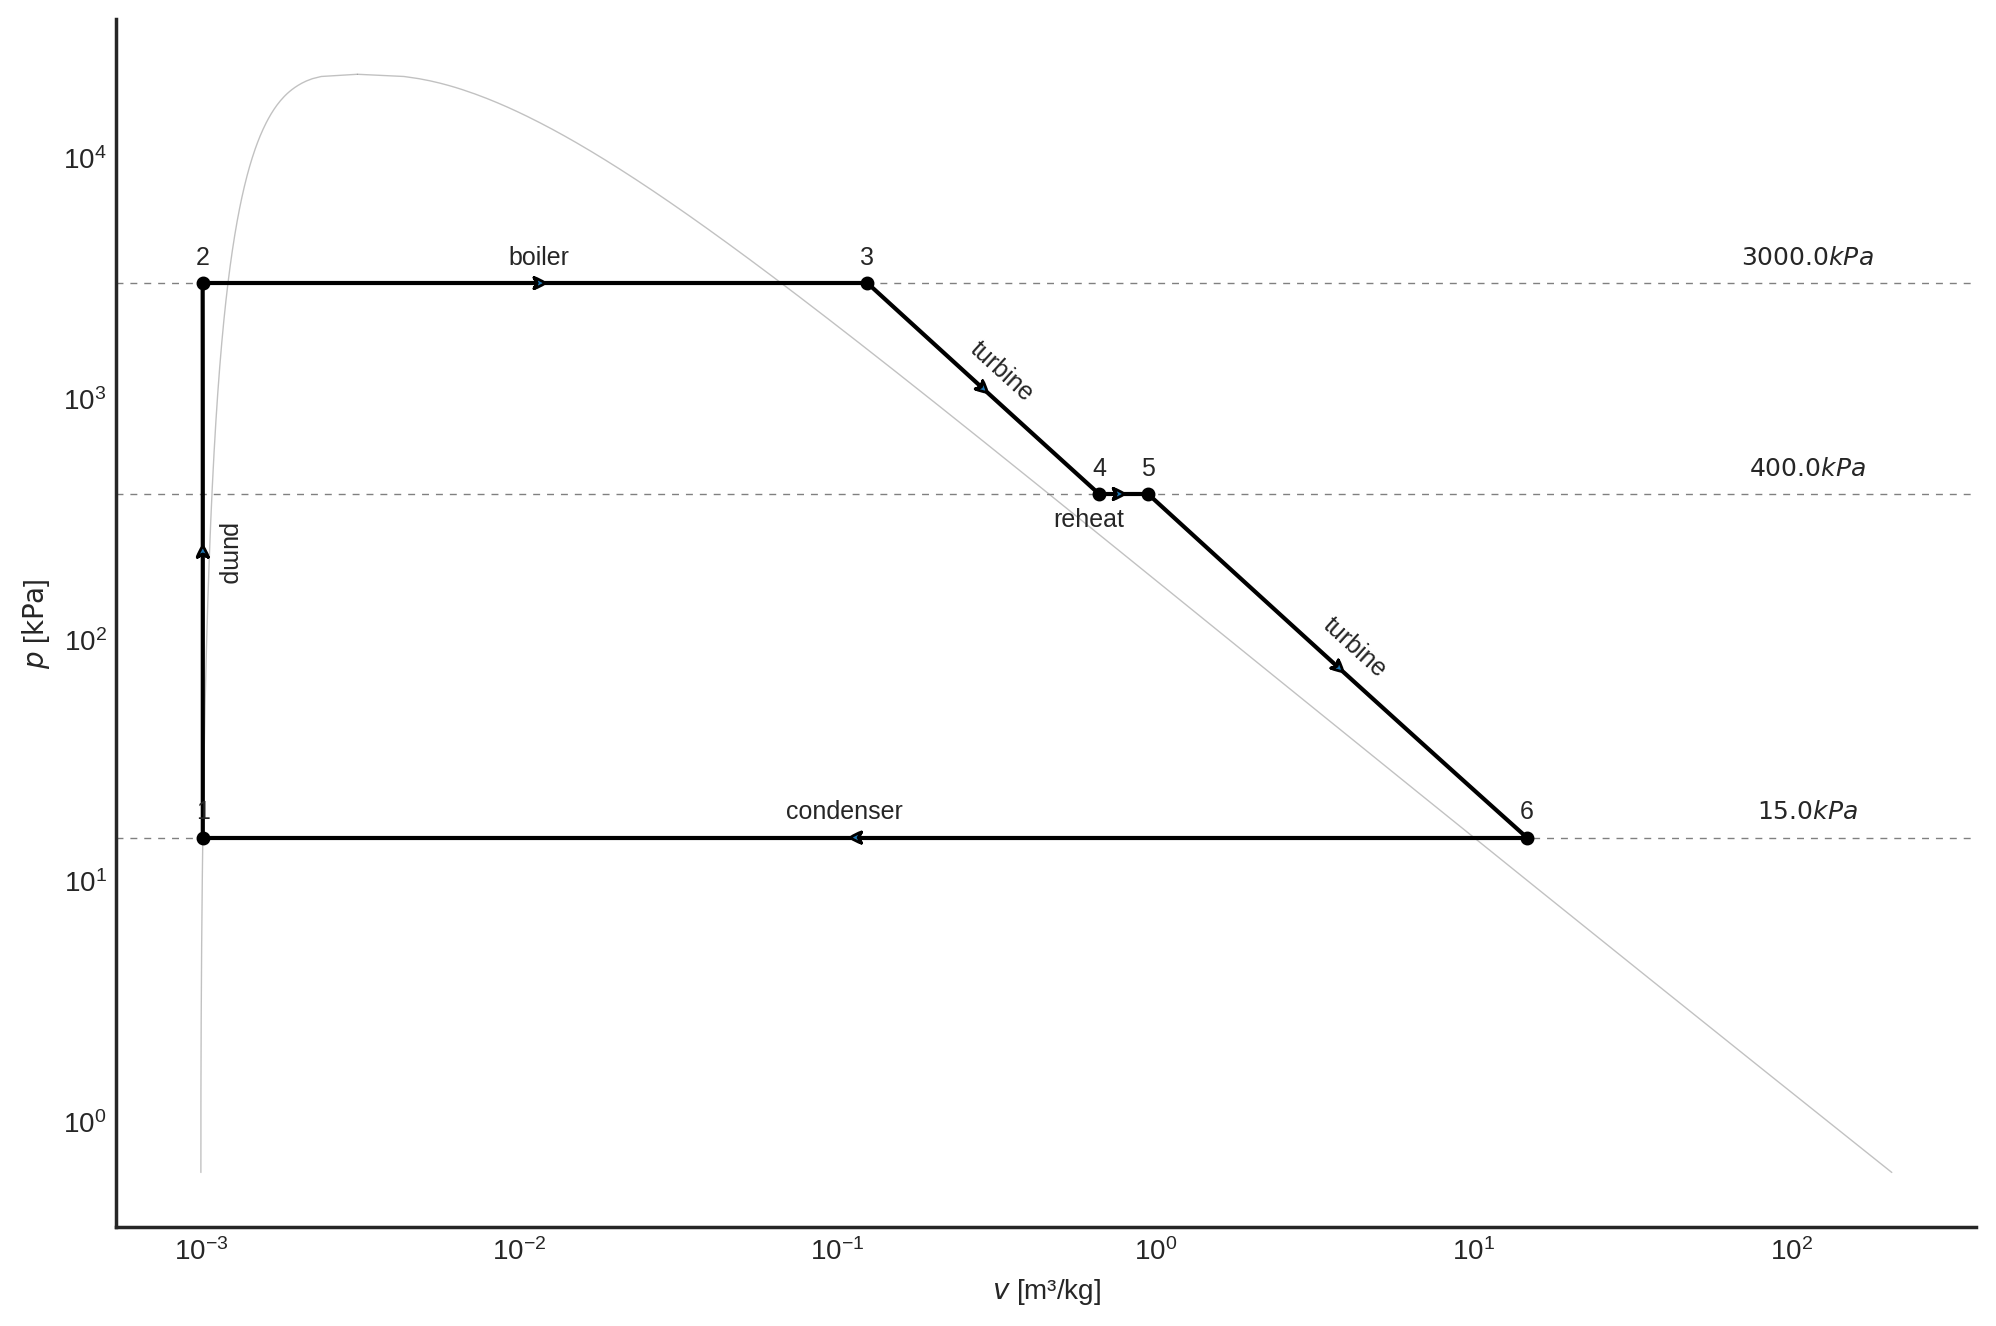

In [10]:
pv = water.pv_diagram()
pv.plot_isobar(p[3])
pv.plot_isobar(p[4])
pv.plot_isobar(p[6])

for state in [1,2,3,4,5,6]:
    pv.plot_state(states[state])
    
pv.plot_process(states[1],states[2],path='nonideal',label='pump')
pv.plot_process(states[2],states[3],path='isobaric',label='boiler')
pv.plot_process(states[3],states[4],path='nonideal',label='turbine')
pv.plot_process(states[4],states[5],path='isobaric',label='reheat',labelprops=dict(ha='right',va='top'))
pv.plot_process(states[5],states[6],path='nonideal',label='turbine')
pv.plot_process(states[6],states[1],path='isobaric',label='condenser');

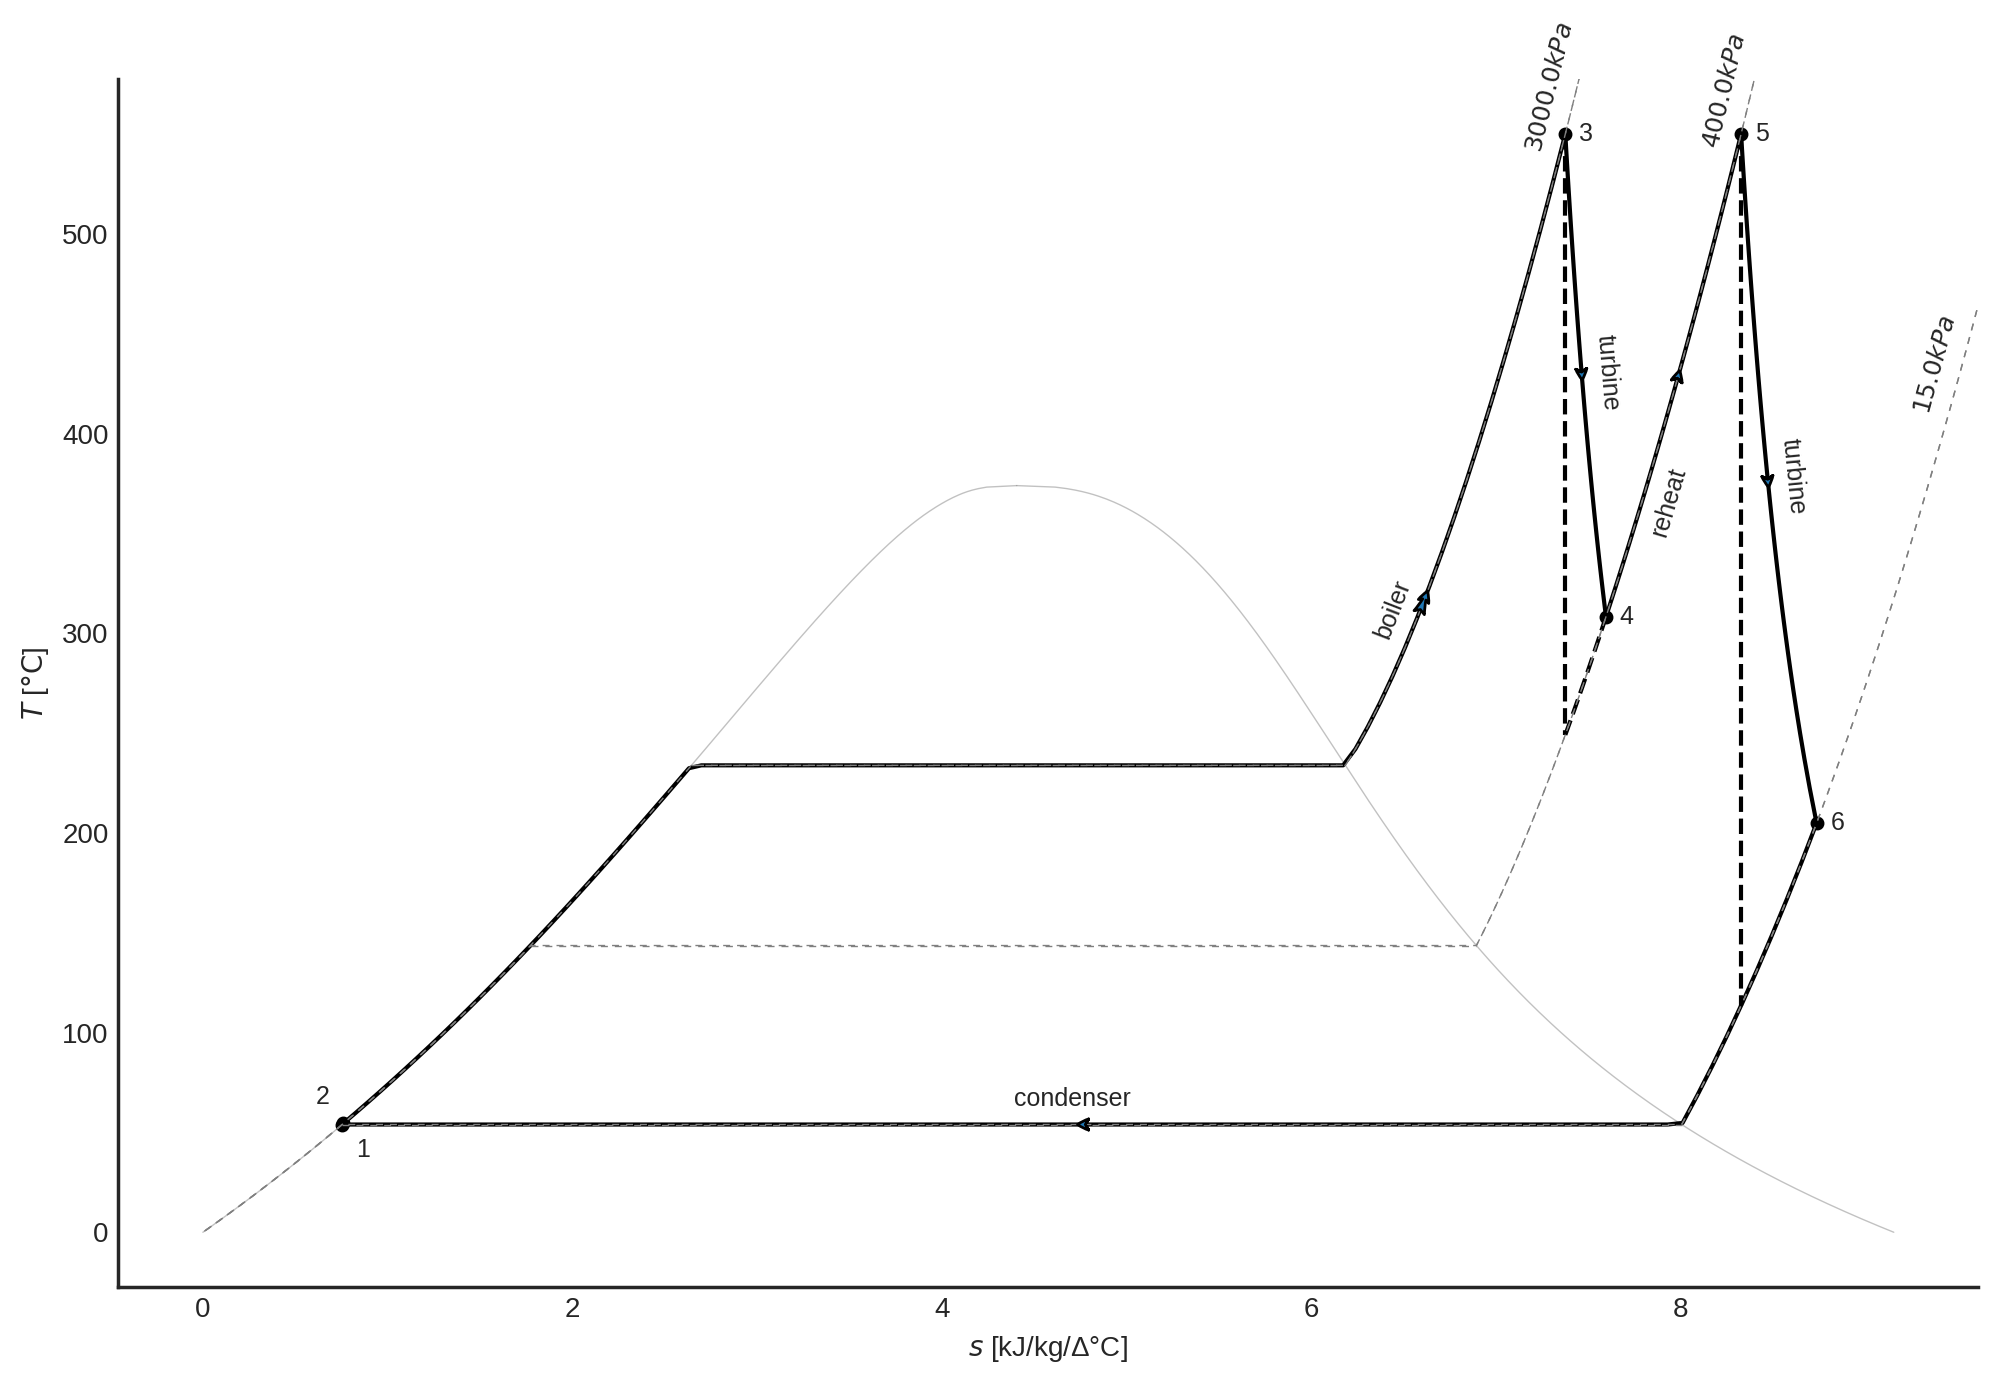

In [11]:
Ts = water.Ts_diagram()

Ts.plot_state(states[1],label_loc='south east')
Ts.plot_state(states[2],label_loc='north west')
Ts.plot_state(states[3],label_loc='east')
Ts.plot_state(states[4],label_loc='east')
Ts.plot_state(states[5],label_loc='east')
Ts.plot_state(states[6],label_loc='east')
    
Ts.plot_process(states[1],states[2],path='nonideal',arrow=False)
Ts.plot_process(states[2],states[3],path='isobaric',label='boiler')
Ts.plot_process(states[3],states[4],path='nonideal',label='turbine')
Ts.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[4],states[5],path='isobaric',label='reheat',labelprops=dict(va='top',pos=.25))
Ts.plot_process(states[5],states[6],path='nonideal',label='turbine')
Ts.plot_process(states[5],states['6s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states['4s'],states[4],path='isobaric',linestyle='dashed',arrow=False)
Ts.plot_process(states[6],states[1],path='isobaric',label='condenser');

Ts.plot_isobar(p[3],pos=.99)
Ts.plot_isobar(p[4],pos=.99)
Ts.plot_isobar(p[6],pos=.99);

In [0]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 5) Execute this cell to create an HTML file showing only the output 
# 6) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html_embed --no-input --no-prompt "Ex10.4 Rankine with Reheat.ipynb"